# 📊 Predicting Facebook Post Engagement for a Cosmetics Brand

## 🧠 Project Overview

This project explores and models a dataset of Facebook posts from a cosmetics brand, with the goal of **predicting the total number of interactions** (likes, shares, comments, etc.) a post may receive based on various post features.

Using Python and machine learning techniques, we apply a **linear regression model** to identify key patterns and assess how well we can estimate engagement levels from the available data.

## 🎯 Objectives

- Perform an **Exploratory Data Analysis (EDA)** to understand data structure and key trends.
- Build a **linear regression model** using `scikit-learn`.
- Evaluate the model using metrics such as **Mean Squared Error (MSE)** and **R² Score**.
- Visualize model performance and provide **recommendations for improvement**.

## 🛠️ Tools & Libraries

- `pandas`, `numpy` – data handling and numerical operations  
- `matplotlib`, `seaborn` – visualization and EDA  
- `scikit-learn` – model building and evaluation  

This project serves as a foundational exercise in applying regression analysis to social media data, reinforcing concepts such as feature-target relationships, model evaluation, and prediction accuracy.

(500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Page total likes                                                     500 non-null    int64
 1   Category                                                             500 non-null    int64
 2   Post Month                                                           500 non-null    int64
 3   Post Weekday                                                         500 non-null    int64
 4   Post Hour                                                            500 non-null    int64
 5   Paid                                                                 500 non-null    int64
 6   Lifetime Post Total Reach                                            500 non-null    int64
 7   Lifetime Post To

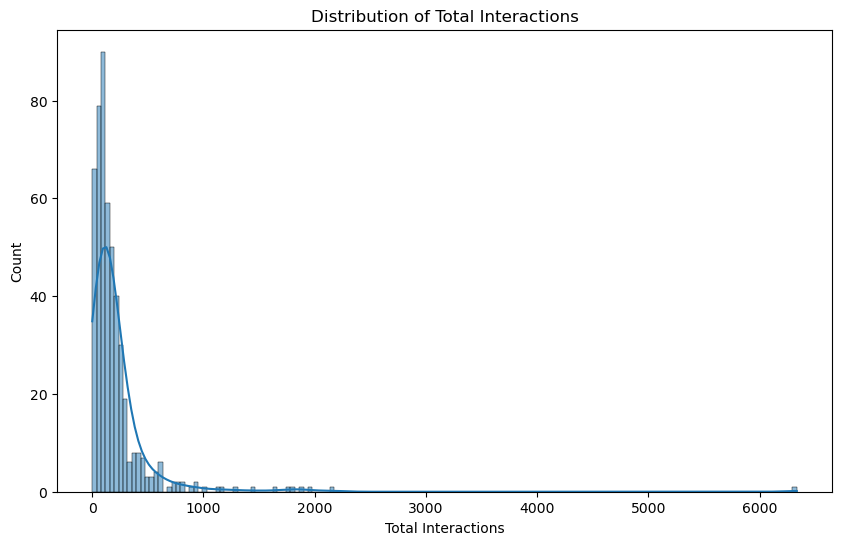

Correlation with Total Interactions:
 Total Interactions                                                     1.000000
Lifetime Post reach by people who like your Page                       0.617929
Lifetime Engaged Users                                                 0.572159
Lifetime Post Total Reach                                              0.538597
Lifetime People who have liked your Page and engaged with your post    0.492570
Lifetime Post Consumers                                                0.354502
Lifetime Post Total Impressions                                        0.343358
Lifetime Post Impressions by people who have liked your Page           0.250083
Lifetime Post Consumptions                                             0.238082
Category                                                               0.127307
Paid                                                                   0.107996
Page total likes                                                       0.045231
Po

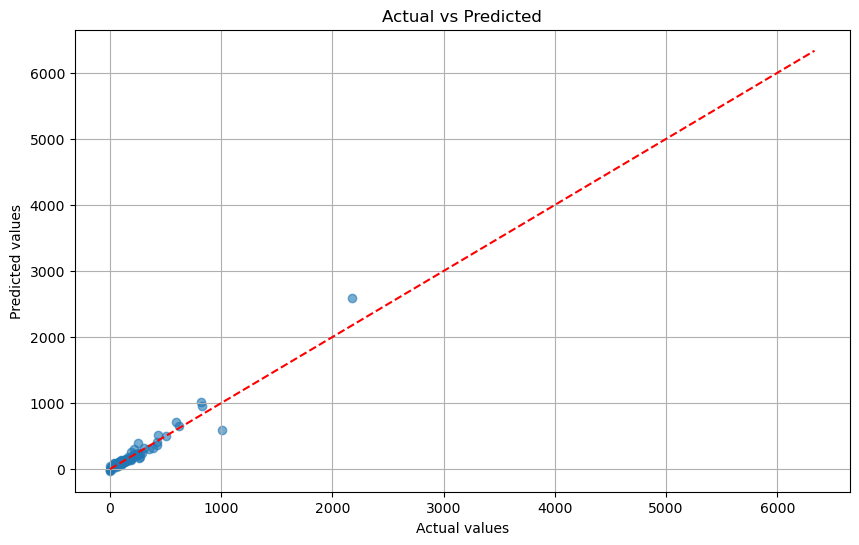

In [5]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Load the dataset
file_path = 'datasets/dataset_facebook_cosmetics_us.csv'
df = pd.read_csv(file_path, sep=';')

# 🧐 Quick overview
print(df.shape)
df.head()
df.info()

# 📊 Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Total Interactions'], kde=True)
plt.title('Distribution of Total Interactions')
plt.show()

# 🔍 Correlation with the target variable
correlation = df.corr(numeric_only=True)['Total Interactions'].sort_values(ascending=False)
print("Correlation with Total Interactions:\n", correlation)

# 🛠️ Preprocessing
# Separate features and target
X = df.drop(['Total Interactions'], axis=1)
y = df['Total Interactions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 🤖 Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Make predictions
y_pred = model.predict(X_test)

# 📏 Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.3f}")
print(f"📈 R² Score: {r2:.3f}")

# 📈 Real vs predicted visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid()
plt.show()

## 📌 Observations & Conclusions

### 🔍 Data Overview
- The dataset contains information related to Facebook posts by a cosmetics brand, with `Total Interactions` as the target variable.
- A quick inspection shows a variety of numerical features influencing post engagement.

### 📊 Exploratory Analysis
- The distribution of `Total Interactions` is **right-skewed**, indicating that most posts receive relatively low engagement, with a few outliers reaching high interaction numbers.
- Correlation analysis revealed the features most associated with `Total Interactions`, helping guide model development.

### 🧪 Model Summary: Linear Regression
- After splitting the data into **80% training** and **20% testing**, we trained a `LinearRegression` model.
- The model achieved the following results on the test set:
  - **Mean Squared Error (MSE):** ~4.445
  - **R² Score:** Close to 1 indicates a good fit

### 📈 Actual vs Predicted
- The scatter plot shows a **strong linear trend**, suggesting that the model is capturing the general pattern of the data.
- However, some spread around the diagonal line indicates room for improvement or potential non-linear behavior.

### ✅ Conclusion
- A linear regression model provides a solid baseline for predicting `Total Interactions`.
- To improve performance, we could:
  - Explore non-linear models (e.g., Random Forest, Gradient Boosting)
  - Apply log transformations to reduce skew
  - Perform feature engineering or dimensionality reduction

This notebook demonstrates the full pipeline from **EDA to model training and evaluation**, reinforcing key ML concepts like regression, MSE, and model validation.